In [4]:
import altair as alt
from vega_datasets import data
import pandas as pd
import numpy as np

In [7]:
data = pd.read_csv("dadosSP.csv")
data.head()

,Unnamed: 0,NO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,0,Araraquara,29.0,F,1,1,11,1,0,NaN,445.4,589.0,621.5,465.5,560.0
1,21,Diadema,19.0,F,1,1,2,1,0,NaN,402.9,447.6,537.3,425.5,640.0
2,25,Santa Fé do Sul,24.0,M,1,1,7,1,0,NaN,706.5,709.9,625.1,769.1,620.0
3,32,São Paulo,28.0,F,2,1,11,1,0,NaN,631.1,609.7,596.1,535.5,720.0
4,45,São Paulo,18.0,F,1,1,1,1,0,NaN,685.2,719.2,619.4,799.6,800.0


In [33]:
data_s = data.sample(2500)

In [34]:
data_s['Mean_notes'] = (data_s.NU_NOTA_CH+data_s.NU_NOTA_CN+data_s.NU_NOTA_LC + data_s.NU_NOTA_MT + data_s.NU_NOTA_REDACAO)/5

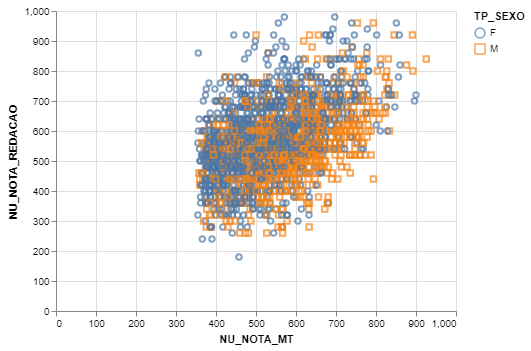

In [43]:
alt.Chart(data_s).mark_point().encode(x = 'NU_NOTA_MT', y = 'NU_NOTA_REDACAO', color = 'TP_SEXO', shape = 'TP_SEXO')

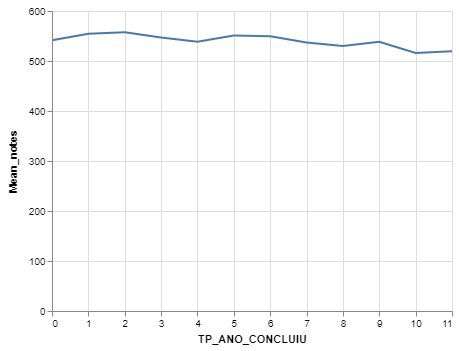

In [44]:
alt.Chart(data_s.groupby('TP_ANO_CONCLUIU').mean().reset_index()).mark_line().encode(x= 'TP_ANO_CONCLUIU', y = 'Mean_notes')

In [45]:
brush = alt.selection_interval()

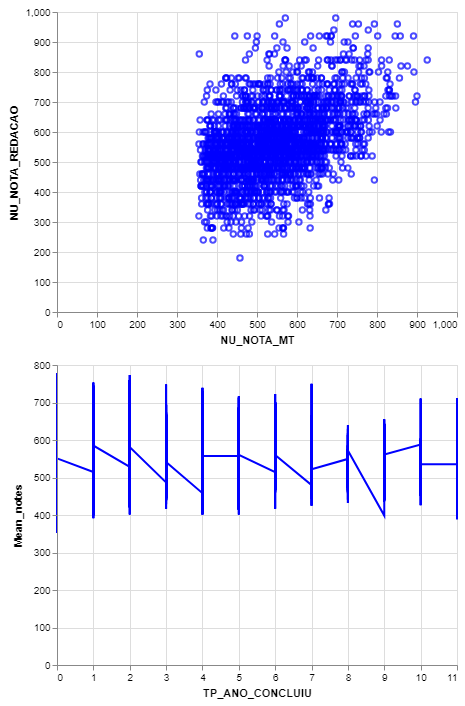

In [47]:
chart1 = alt.Chart(data_s).mark_point().encode(x = 'NU_NOTA_MT', y = 'NU_NOTA_REDACAO', color=alt.condition(brush, alt.value('blue'), alt.value('lightgray'))).add_selection(brush)
chart2 = alt.Chart(data_s).mark_line().encode(x= 'TP_ANO_CONCLUIU', y = 'Mean_notes', color=alt.condition(brush, alt.value('blue'), alt.value('lightgray'))).add_selection(brush)
chart1 & chart2